In [30]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
percent=[]
number=[]
# city=["NY","DC"]
Years=[2012,2013,2014,2015,2016,2017]
base="https://fluvaccineapi.hhs.gov/api/v2/vaccination_rates/2014/national.json?ethnicity=T&medicare_status=A"

base_url="https://fluvaccineapi.hhs.gov/api/v2/vaccination_rates/"
query="/national.json?ethnicity=T&medicare_status=A"

In [32]:
# find vaccinaion for each year (2012-2917)

for x in Years:
#     data=requests.get(base_url+str(x)+query).json()
    data=requests.get(f"https://fluvaccineapi.hhs.gov/api/v2/vaccination_rates/{x}/national.json?ethnicity=T&medicare_status=A").json()
    percent_get_vacinne=data[0]["percentage"]
    num_get_vaccine=data[0]["count"]
    percent.append(percent_get_vacinne)
    number.append(num_get_vaccine)
    print(json.dumps(data,indent=4))
print(f"the number of people get vaccine each year: {number}")
print(f"the proportion of people get vaccine each year: {percent}")

[
    {
        "short_name": "US",
        "name": "National",
        "fips": "0",
        "year": 2012,
        "week": 52,
        "week_start": "03AUG",
        "ethnicity": "T",
        "medicare_status": "A",
        "count": 26043833,
        "percentage": 0.512448,
        "disparity": 0.0
    }
]
[
    {
        "short_name": "US",
        "name": "National",
        "fips": "0",
        "year": 2013,
        "week": 52,
        "week_start": "02AUG",
        "ethnicity": "T",
        "medicare_status": "A",
        "count": 27278865,
        "percentage": 0.505152,
        "disparity": 0.0
    }
]
[
    {
        "short_name": "US",
        "name": "National",
        "fips": "0",
        "year": 2014,
        "week": 52,
        "week_start": "01AUG",
        "ethnicity": "T",
        "medicare_status": "A",
        "count": 28830312,
        "percentage": 0.501874,
        "disparity": 0.0
    }
]
[
    {
        "short_name": "US",
        "name": "National",
        "fip

(0, 31422333)

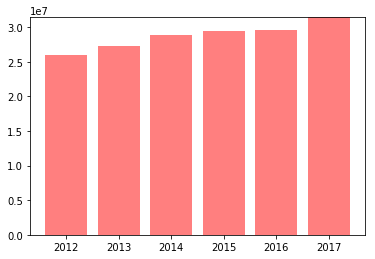

In [50]:
Years=[2012,2013,2014,2015,2016,2017]
number=[26043833, 27278865, 28830312, 29517227, 29624654, 31422333]
x_axis = np.arange(len(number))
plt.bar(x_axis,number , color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Years)
plt.ylim(0, max(number))

In [74]:
# test test
Years=[2012,2013,2014,2015,2016]
years=[]
week=[]
week_percent=[]
# analysis vaccination rate of every week to find the trend within each year
trend_url="https://fluvaccineapi.hhs.gov/api/v2/vaccination_rates/trends/"
query2="/national.json?ethnicity=T&medicare_status=A"
for y in Years:    
    week_data=requests.get(trend_url+str(y)+query2).json()
    memory=json.dumps(week_data,indent=4)
print(len(memory))
    
# for i in range(len(memory)) :
#     year_order=memory[i]["year"]
#     year.append(year_order)
#     week_order=memory[i]["week"]
#     week.append(week_order)
#     percent_each_week=memory[i]["percentage"]
#     week_percent.append(percent_each_week)
# print(year_order,week_order,percent_each_week)

15910


In [111]:
# analysis vaccination rate of every week to find the trend within each year

Years=[2012,2013,2014,2015,2016,2017]  #there are only 25 weeks in 2017, 10 weeks in 2012
year=[]
week=[]
week_percent=[]

trend_url="https://fluvaccineapi.hhs.gov/api/v2/vaccination_rates/trends/"
query2="/national.json?ethnicity=T&medicare_status=A"
for y in Years:    
    week_data=requests.get(trend_url+str(y)+query2).json()
#     print(json.dumps(week_data,indent=4))
#     print(len(week_data))
    for i in range(len(week_data)) :
        year_order=week_data[i]["year"]
        year.append(year_order)
        week_order=week_data[i]["week"]
        week.append(week_order)
        percent_each_week=week_data[i]["percentage"]
        week_percent.append(percent_each_week)
#         print(year_order,week_order,percent_each_week)
#     print(f"the vaccination rate for {year_order} week {week_order} is {percent_each_week}" )
# # now I want to put these year,week, percent data into dataframe
df=pd.DataFrame({"Year":year,"Week":week,"Vaccination rate":week_percent})

df.to_csv("VaccinationRate.csv",index=False)
df.head()



,Year,Week,Vaccination rate
0,2012,43,0.512392
1,2012,44,0.512401
2,2012,45,0.512409
3,2012,46,0.512415
4,2012,47,0.512419


In [112]:
vaccination_df = pd.read_csv('VaccinationRate.csv')
vaccination_df.head()


,Year,Week,Vaccination rate
0,2012,43,0.512392
1,2012,44,0.512401
2,2012,45,0.512409
3,2012,46,0.512415
4,2012,47,0.512419


In [116]:
data=df.set_index(["Year"])
data.head()

,Week,Vaccination rate
Year,,
2012,43,0.512392
2012,44,0.512401
2012,45,0.512409
2012,46,0.512415
2012,47,0.512419


In [128]:
# data2012=df.loc["2012",:] I don't know why this did not work
data2012=data.iloc[0:10,:]
data2013=data.iloc[10:62,:]
data2014=data.iloc[62:114,:]
data2015=data.iloc[114:114+52,:]
data2016=data.iloc[114+52:114+52+52,:]
data2017=data.iloc[114+52+52:114+52+52+25,:]
data2017.head()

,Week,Vaccination rate
Year,,
2017,1,0.001697
2017,2,0.005075
2017,3,0.010479
2017,4,0.020088
2017,5,0.036383


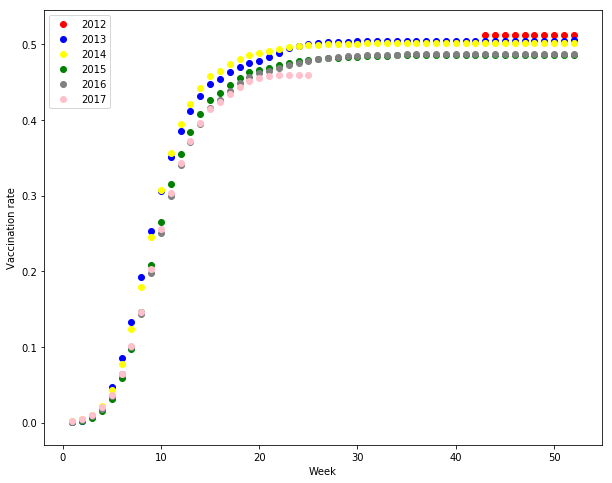

In [148]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.scatter(data2012["Week"], data2012["Vaccination rate"],color="red",label="2012")
plt.scatter(data2013["Week"], data2013["Vaccination rate"],color="blue",label="2013")
plt.scatter(data2014["Week"], data2014["Vaccination rate"],color="yellow",label="2014")
plt.scatter(data2015["Week"], data2015["Vaccination rate"],color="green",label="2015")
plt.scatter(data2016["Week"], data2016["Vaccination rate"],color="grey",label="2016")
plt.scatter(data2017["Week"], data2017["Vaccination rate"],color="pink",label="2017")

plt.xlabel('Week')
plt.ylabel('Vaccination rate')
plt.legend(loc="best")
plt.show()



In [9]:
# find people who get flu
flu_df=pd.read_csv("get_flu.csv")
flu_df.head()

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,...,TOTAL PATIENTS,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,National,X,1997,40,1.10148,1.21686,179,X,157,205,...,46842,570.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,National,X,1997,41,1.20007,1.28064,199,X,151,242,...,48023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,National,X,1997,42,1.37876,1.23906,228,X,153,266,...,54961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,National,X,1997,43,1.19920,1.14473,188,X,193,236,...,57044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,National,X,1997,44,1.65618,1.26112,217,X,162,280,...,55506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
get_flu=flu_df.groupby(["YEAR"]).agg({"ILITOTAL":"sum"})
get_flu


# year_2012=flu_df.loc[(flu_df.loc["YEAR"]==2012),"ILITOTAL"]

,ILITOTAL
YEAR,
1997,13442
1998,38936
1999,80170
2000,66459
2001,92012
2002,95935
2003,233939
2004,140497
2005,281481


Text(0.5,1,'The Trend of people who get flu per year')

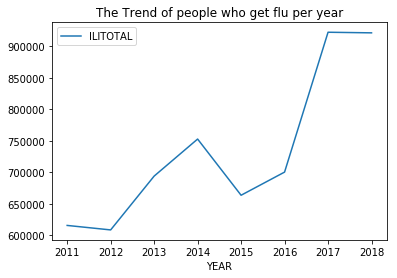

In [48]:
target=get_flu.iloc[14:22,:]
target

target.plot()
plt.title("The Trend of people who get flu per year")

In [49]:
data2008=flu_df.loc[flu_df["YEAR"==2018],:]

KeyError: False